Sebastian Kurniawan

CHEM E 465

Homework 2 Python

In [0]:
import numpy as np;
import matplotlib.pyplot as plt;

Fa_0 = 300; # mol/min
X_A = np.array([0, 0.2, 0.4, 0.5, 0.6, 0.8, 0.9]);
minus_r_A = np.array([2.0, 3.2, 9.5, 10, 8.5, 2.5, 2.0]);

Fa_div_rA = minus_r_A ** -1 * 300;


(a) I imported the required libraries, then made arrays for the x- and y-coordinate data for my Levenspiel plot. The **Fa_div_rA** array represents Fa0 / -rA, which are the y-values for the plot. I raised -rA to the power of -1 then subsequently multiplied by 300 to get the desired form. 

Note that nothing is plotted yet. That is done later so you can see the overlay between the experimental and least squares fit.

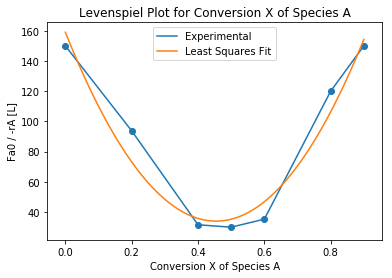

In [0]:
coeff = np.polyfit(X_A, Fa_div_rA, 2);

# new, more "continuous" array of conversion X of species A
new_x = np.linspace(0, 0.9, 91)

# calculating a new array of Fa0 / -rA based on the least squares fit
calcd_fadivra = coeff[0]*new_x**2 + coeff[1]*new_x + coeff[2]


plt.plot(X_A, Fa_div_rA, label="Experimental")
plt.scatter(X_A, Fa_div_rA)
plt.title("Levenspiel Plot for Conversion X of Species A")
plt.ylabel("Fa0 / -rA [L]")
plt.xlabel("Conversion X of Species A")

plt.plot(new_x, calcd_fadivra, label="Least Squares Fit")
plt.legend()


(b) I got the coefficients for the least square fit using a numpy method called **polyfit**, which spit out the coefficients for a 2nd order polynomial (specified by me) in array form. I then made a **new_x** array which represents conversion, and made it have 91 points (going in 0.01 increments to 0.9) for better resolution (a more "continuous" version) of the least squares fit. **calcd_fadivra** is then just taking each element of the **new_x** array and subjecting it to the least squares fit.

Finally, I plotted the experimental data and the least squares fit data on one plot and added the title, axis titles, legend, etc. You can see that the experimental data is a little choppy but the least squares fit is quite smooth - "continuous".

In [0]:
# CSTR calculation - the rectangle of Fa0 / -rA and X
# using experimental data (not specified in homework prompt whether fit or experimental should be used)


CSTR_V = X_A[4] * Fa_div_rA[4];

print("CSTR volume for 60% conversion: ", CSTR_V, " L")

# PFR calculation - area under the curve; will be using experimental data
PFR_V = np.trapz([Fa_div_rA[0], Fa_div_rA[1], Fa_div_rA[2], Fa_div_rA[3], Fa_div_rA[4]], [X_A[0], X_A[1], X_A[2], X_A[3], X_A[4]]);
print("PFR volume for 60% conversion: ", PFR_V, " L")


CSTR volume for 60% conversion:  21.176470588235293  L
PFR volume for 60% conversion:  43.25154798761611  L


(c) Lastly, using the concepts from lecture and the textbook, I calculate the volume required for 60% conversion in both a CSTR and PFR. For the CSTR, we already know the x and y value corresponding to a conversion of 0.6, so we just multiply them together to get our reaction volume.

For the PFR we integrate ***up to a conversion of 0.6*** using np.trapz() as suggested in the homework instructions. I do this by manually creating the x and y arrays such that only the points up to a conversion of 0.6 are used - nothing more - as that would add excess conversion and reaction volume. I print out the volumes using some simple print commands so that the client can see them easily.